<h3> Neural Network <div style="float:right"><img class="w3-card-4"
     src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg/1200px-Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg.png"
                                                                          width="100px" object-position="right top"></div></h3>
<div style="clear:both"></div>

<center>
    <h1> Course 1 : prerequisite in python and mathematics (SOLUTIONS)  </h1>
</center>

In [5]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import Latex

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

# Derivative

<div class="alert alert-success" role="alert">
Let $f \colon I \to \mathbb{R}$ a function. If it exists, the derivative of $f$ in $x_0 \in I$ is the number 
    $$\displaystyle \lim_{x\rightarrow x_0}\frac{f(x)-f(x_0)}{x-x_0} = \lim_{h\rightarrow 0}\frac{f(x_0 + h)-f(x_0)}{h} = f'(x_0) = \frac{df}{dx}(x)$$
An another way to see that is by considering the Taylor expansion :
	$$ \forall h, \ \ f(x_0 + h) = f(x_0) + f'(x_0) \cdot h + h \varepsilon(h) \ \ 
		\text{ with } \displaystyle\lim_{h \rightarrow 0} \varepsilon(h) = 0 $$
        
Thus, $f'(x_0) \approx \dfrac{f(x_0 + h)-f(x_0)}{h}$ if $h$ is small.
</div>

### Example :
Let $f(x) = \mathrm{exp}(x)$. We have $\frac{f(0 + h)-f(0)}{h} = \frac{e^h - 1}{h} \xrightarrow[h \to 0]{} 1$ so we prove that $f'(0) = 1$. 

### Exercise
<div class="alert alert-dark" role="alert">
    Write a python function which computes an approximation of the derivative of a given function.
</div>


In [14]:
def derivatives(f, x, h):
    df  = (f(x + h)-f(x))/(h)
    return df

In [15]:
derivatives(sin,0,0.001)

0.9999998333333416

### Exercise
<div class="alert alert-dark" role="alert">
Fill in the blank in the following code so that the plot shows the graph of a function $f$ and its derivative.</div>

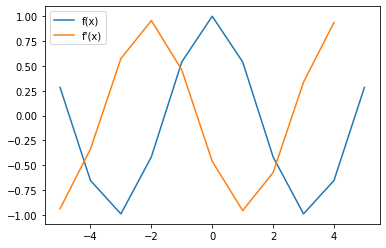

In [17]:
N = 11 
x = linspace(-5,5,N)
y = cos(x) # you can change the function f here
h = x[1]-x[0] # step of discretization

# values of the derivative
yp = (y[1:] - y[:-1]) / h

plot(x, y, label="f(x)")
plot(x[:-1], yp, label="f'(x)")

legend()
show()

## How to compute the exact derivative

### Usual formulas

https://en.wikipedia.org/wiki/Derivative#Rules_of_computation

### Chain rule

<div class="alert alert-danger" role="alert">	

Let two real differentiable functions $f \colon x \mapsto f(x)$ and $x \colon t \mapsto x(t)$.
The function   $g \colon t  \mapsto  x(t)  \mapsto f(x(t)) $ is differentiable and 

$$ g'(t) = f'(x(t)) \cdot x'(t) $$
</div>


# Multivariables function and optimization



## Definition
<div class="alert alert-success" role="alert">
	A real-valued function of n real variables is a function $f \colon \mathbb{R}^n \to \mathbb{R}^m$ which maps $X = (x_1,...,x_n) \in \mathbb{R}^n$ to $f(X) \in \mathbb{R}^m$. It is also called a n-ary function.
	
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Real_function_of_two_real_variables.svg/800px-Real_function_of_two_real_variables.svg.png"
     alt="picture of multiple variables function"
     style="float: left; margin-right: 10px; width: 300px" />

<div class="alert alert-success" role="alert">
Let $f$ a n-ary function. 	The partial derivative of $f$ in the direction xi at the point (a1, ..., an) is defined to be: 
	$$\frac{\partial f}{\partial x_i}(a_1, \ldots, a_n) = \lim_{h \to 0}\frac{f(a_1, \ldots, a_i+h,\ldots,a_n) - f(a_1,\ldots, a_i, \dots,a_n)}{h}.$$
</div>

#### Example
Le $f \colon (x,y) \mapsto x^2 + 2xy - 2y^2$. Then 
$$\frac{\partial f}{\partial x}(x,y) = 2x+2y \qquad ; \qquad \frac{\partial f}{\partial y}(x,y) = 2x - 4y $$

### Gradient
<p>Let <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, its gradient <span class="math inline">\(\nabla f \colon \mathbf{R}^n \to \mathbf{R}^n\)</span> is defined at the point <span class="math inline">\(p = (x_1,\ldots,x_n)\)</span> in <em>n-</em>dimensional space as the vector: </p>

<p><span class="math inline">\(\nabla f(p) = \begin{bmatrix}\frac{\partial f}{\partial x_1}(p) \\ \vdots \\ \frac{\partial f}{\partial x_n}(p) \end{bmatrix}.\)</span></p>

#### Exercise : 
Define a function which computes an approximated gradient on a point $x \in \mathbb{R}^n$. Let $\varepsilon = 10^{-8}$ be the precision.

In [18]:
epsilon=1e-8
def gradientApprox(f,x):
    fx=f(x)
    n=size(x)
    gra=zeros(n)
    for i in range(n):
        veps=zeros(n)
        veps[i]+=epsilon
        gra[i]=(f(x+veps)-fx)/epsilon
    return gra

In [19]:
def fa(X):  #X in R^2
    return 1-1/(1+3*X[0]**2+X[1]**2)

In [20]:
X = array([1,1])
print(gradientApprox(fa,X))

[0.24 0.08]


### Chain rule

#### 1st case : $\mathbb{R} \to \mathbb{R}^2 \to \mathbb{R}$

Let $f \colon (x,y) \mapsto f(x,y)$, $x \colon t \mapsto x(t)$ and $y \colon t \mapsto y(t)$.

Then $g \colon t \mapsto (x(t),y(t)) \mapsto f(x(t),y(t))$ is differentiable and 
$$g'(t) = \frac{\partial f}{\partial x}(x(t),y(t)) \cdot x'(t) + \frac{\partial f}{\partial y}(x(t),y(t)) \cdot y'(t)$$

#### 2nd case : $\mathbb{R}^2 \to \mathbb{R}^2 \to \mathbb{R}$

Let $f \colon (x,y) \mapsto f(x,y)$, $x \colon (t,u) \mapsto x(t,u)$ and $y \colon (t,u) \mapsto y(t,u)$.

Then $g \colon (t,u) \mapsto (x(t,u),y(t,u)) \mapsto f(x(t,u),y(t,u))$ is differentiable and 
$$\frac{\partial g}{\partial t}(t,u) = \frac{\partial f}{\partial x}(x(t,u),y(t,u)) \cdot \frac{\partial x}{\partial t}(t,u) + \frac{\partial f}{\partial y}(x(t,u),y(t,u)) \cdot \frac{\partial y}{\partial t}(t,u)$$
$$\frac{\partial g}{\partial u}(t,u) = \frac{\partial f}{\partial x}(x(t,u),y(t,u)) \cdot \frac{\partial x}{\partial u}(t,u) + \frac{\partial f}{\partial y}(x(t,u),y(t,u)) \cdot \frac{\partial y}{\partial u}(t,u)$$

#### Exercise

Let $f$ a function defined on a domain $D \subset \mathbb{R}^2$ by 	$$f(x,y)= e^{\sqrt{x}y-x\sqrt{y}}  $$ and  two functions $x$ and $y$ defined on $\mathbb{R}$ by		$$x(t)=3t \quad y(t)=t(1-t)$$

Let $G(t) = f(x(t),y(t))$. Compute $G'(t)$ for all $t$ where $G$ is differentiable.

**Answer** : chain rule : $G'(t) = \frac{\partial f}{\partial x}(x(t),y(t)) \times x'(t) + 			\frac{\partial f}{\partial y}(x(t),y(t)) \times  y'(t) = \left( 3\left( \frac{t(1-t)}{2\sqrt{3t}} - \sqrt{t(1-t)} \right) + (1-2t)\left(\sqrt{3t} - \frac{3t}{2\sqrt{t(1-t)}} \right) \right) e^{\sqrt{3t}t(1-t)-3t\sqrt{t(1-t)}}$.

### Optimization

<div class="alert alert-success" role="alert">
Let <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, a critical point is a vector $p = (x_1,\ldots,x_n)$ such that $\nabla f(p) = 0$.
</div>

<div class="alert alert-danger" role="alert">	
Let <span class="math inline">\(f \colon \mathbf{R}^n \to \mathbf{R}\)</span>, if $f$ has a local extremum at $p$ then $p$ is a critical point.
</div>

If $n=2$, considering the second derivatives allows to classify critical points :

<img src="https://math.libretexts.org/@api/deki/files/11440/imageedit_9_5374076016.png?revision=1"
     alt="picture of multiple variables function"
     style="float: left; margin-right: 10px; width: 800px" />

More details here : 
https://math.libretexts.org/Courses/Monroe_Community_College/MTH_212_Calculus_III/Chapter_13%3A_Functions_of_Multiple_Variables_and_Partial_Derivatives/13.8%3A_Optimization_of_Functions_of_Several_Variables 

## Plotting two variables functions

In [8]:
from mpl_toolkits.mplot3d import Axes3D

### Exercise
Let 3 functions :
* $f_1(x,y) = \sqrt{1-\left(2-\sqrt{x^2+y^2}\right)^2 }$
* $f_2(x,y) = x^2 + \frac{10}{y^2+1}$
* $f_3(x,y) = 5(x^2+y^2)e^{-x^2-y^2}$

By filling the following code, plot each function below.

In [9]:
def f1(x,y):
    z=sqrt(1-(2-sqrt(x**2+y**2))**2)
    return z

In [10]:
n=100
min=-3
max=3
VX = linspace(min,max,n)
VY = linspace(min,max,n)
X,Y = meshgrid(VX,VY)
Z = f1(X,Y)

D:\APPLICATIONS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


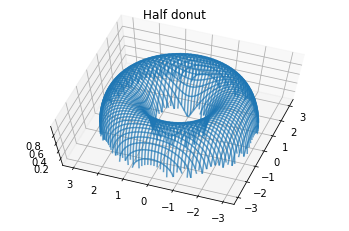

In [11]:
ax = axes(projection='3d')
ax.plot_wireframe(X, Y, Z,alpha=0.7)
ax.view_init(70, -160)
title('Half donut')
show()

In [12]:
def f2(x,y):
    z=x**2+10/(y**2+1)
    return z

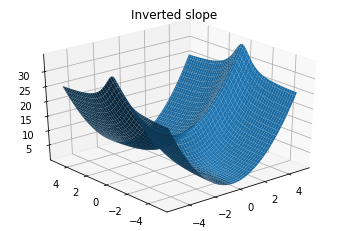

In [13]:
n=100
min=-5
max=5
VX = linspace(min,max,n)
VY = linspace(min,max,n)
X,Y = meshgrid(VX,VY)
Z = f2(X,Y)
ax = axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(30, -130)
title('Inverted slope')
show()

In [14]:
def f3(x,y):
    z=5*(x**2+y**2)*exp(-x**2-y**2)
    return z

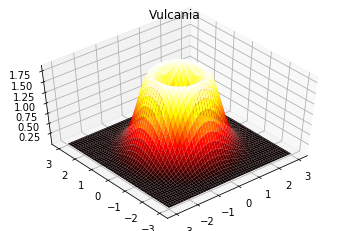

In [15]:
n=100
min=-3
max=3
VX = linspace(min,max,n)
VY = linspace(min,max,n)
X,Y = meshgrid(VX,VY)
Z = f3(X,Y)
ax = axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='hot')
ax.view_init(50, -130)
title('Vulcania')
show()

### Exercise

Let $f(x,y)=xe^{-x^2-y^2}$. By plotting this function on the square $[-4;4]^2$, do you think it admits local extrema ?

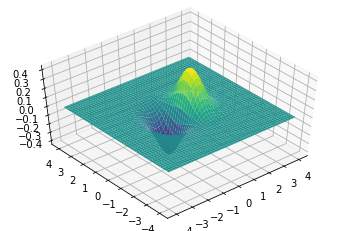

In [16]:
def f(x,y):
    z=x*exp(-x**2-y**2)
    return z

n=100
min=-4
max=4
VX = linspace(min,max,n)
VY = linspace(min,max,n)
X,Y = meshgrid(VX,VY)
Z = f(X,Y)
ax = axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.view_init(50, -130)
show()

By plotting some level sets, identify critical points of this function :

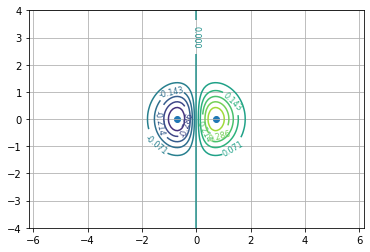

In [17]:
my_levels = linspace(-0.5,0.5,15)
levels=contour(X,Y,Z,my_levels,cmap='viridis')
grid()
clabel(levels,inline=1,fontsize=8)
scatter([1/sqrt(2),-1/sqrt(2)],[0,0])
axis('equal')
show()

Define a function which compute the exact gradient of this function $f$. Verify that critical points you found above really are critical points. 

In [19]:
def dfx(x,y):
    z=(1-2*x**2)*exp(-x**2-y**2)
    return z

def dfy(x,y):
    z=-2*x*y*exp(-x**2-y**2)
    return z

def gradientf(x,y):
    return array([dfx(x,y),dfy(x,y)])

gradientf(1/sqrt(2),-1/sqrt(2))

array([8.16856452e-17, 3.67879441e-01])

This is a function to visualize level sets in a chosen square :

In [22]:
def levelset(min,max):
    n=100
    VX = linspace(min,max,n)
    VY = linspace(min,max,n)
    X,Y = meshgrid(VX,VY)
    Z = f(X,Y)
    my_levels = linspace(-0.4,0.4,50)  #display 50 levels between -0.4 and 0.4
    levels=contour(X,Y,Z,my_levels,cmap='viridis',alpha=0.6)
    grid()
    clabel(levels,inline=1,fontsize=8)
    scatter([1/sqrt(2),-1/sqrt(2)],[0,0])
    axis('equal')

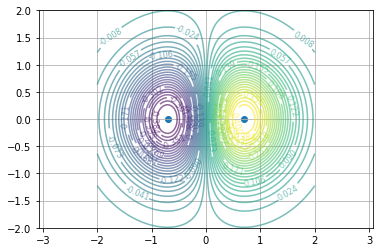

In [23]:
levelset(-2,2)
show()

In [24]:
def plot_gradient(x,y):
    M=array([x,y])  #define a point M with its coordinates
    arrow(M[0],M[1],gradientf(x,y)[0],gradientf(x,y)[1],width=0.04,head_width=0.08,color='red') #plot an arrow from point M, oriented by the gradient

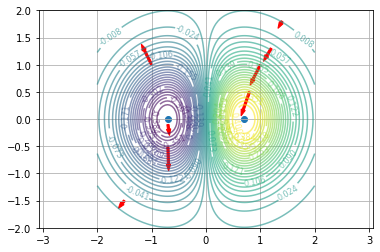

In [25]:
levelset(-2,2)
plot_gradient(-1,1)
plot_gradient(1,1)
plot_gradient(1.2,1.3)
plot_gradient(0.8,0.5)
plot_gradient(1.4,1.8)
plot_gradient(-0.7,-0.1)
plot_gradient(-0.7,-0.5)
plot_gradient(-1.5,-1.5)
show()

## Gradient Descent

These experiments above are a first approch of an algorithm which gives a sequence converging to local extrema. A well known algorithm is the gradient descent algorithm which we will use to minimize error in neural networks.

#### Algorithm : 
It gives a sequence $x_0,x_1,...$ defined by this algorithm :
1. Compute gradient : $\nabla f(x_k)$ ;
2. Stopping criteria : $||\nabla f(x_k)||<\varepsilon$ ;
3. Choose a step $\alpha_k >0$ ;
4. Iteration : $x_{k+1} = x_k - \alpha_k \nabla f(x_k)$.

#### Example with fixed step size

In [26]:
def gradientFixedStep(f,X0,step,eps,N=200):
    lX=[X0]
    X=X0
    grad = gradientApprox(f,X0)
    n=0
    while norm(grad)>eps and n<N:
        n = n+1
        X = X - step*grad
        grad = gradientApprox(f,X)
        lX.append(X)
    return lX

We test this method with function fa :

In [27]:
def fa(X):  #X in R^2
    return 1-1/(1+3*X[0]**2+X[1]**2)

In [28]:
L = gradientFixedStep(fa,[1,1],0.2,1e-5,100)

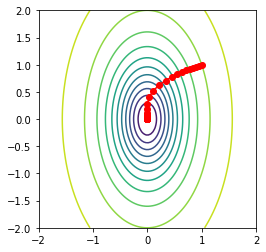

In [29]:
Lx0 = [X[0] for X in L]
Lx1 = [X[1] for X in L]
n=100
min=-2
max=2
VX = linspace(min,max,n)
VY = linspace(min,max,n)
Z=array([[fa(array([x0,x1])) for x0 in VX] for x1 in VY])
contour(VX,VY,Z,12)
plot(Lx0,Lx1,"-ro")
axis('scaled')
show()